# *Tratamento classificacao previsão de Doenças Cardiacas*\:
Este projeto tem por objetivo desenvolver um algoritimo de Machine Learning para prever a tendencia de uma pessoa desenvolver algum tipo de doença cardiaca com base em alguns fatores clinicos e laboratoriais de referência.



[Os dados foram extraidos do site do Kaggle:](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)



In [10]:
import numpy as np
import pandas as pd

In [11]:
dados = pd.read_csv('/content/drive/MyDrive/CursoMCL/heart.csv', sep = ',', encoding='iso-8859-1');

In [12]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
dados.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [14]:
dados.shape

(918, 12)

In [17]:
dados['Age'].value_counts() #valores iguais

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [18]:
dados['Age'].value_counts().sort_index() #valores iguais e em ordem crescente

28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: Age, dtype: int64

In [27]:
import plotly.express as px

In [28]:
histograma = px.histogram(dados, x = "Age", nbins = 60)
histograma.update_layout(width = 800, height = 500, title_text = 'Distribuição das idades')
histograma.show()

In [29]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

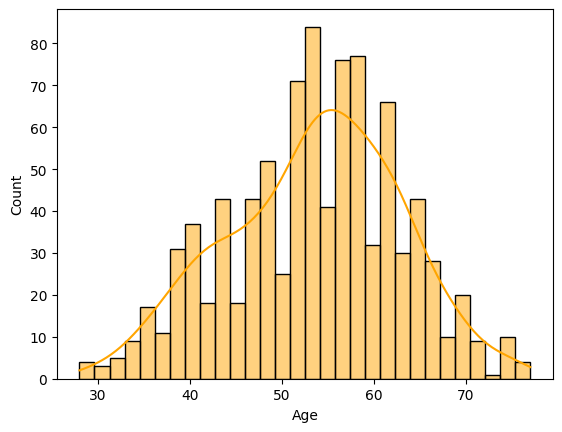

In [35]:
sns.histplot(dados, x = 'Age', bins = 30,color = "orange", kde = True, stat = "count")

In [36]:
dados['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

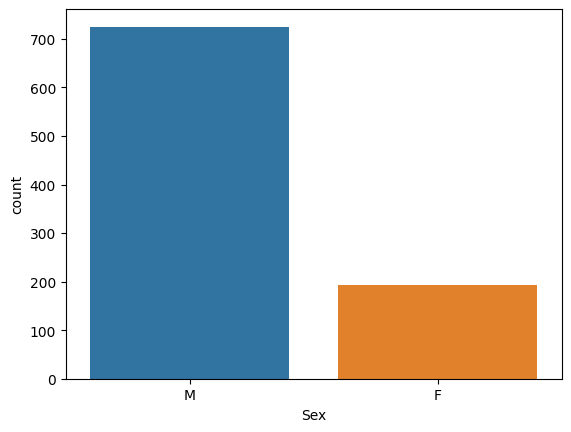

In [37]:
sns.countplot(x = 'Sex', data = dados)

In [38]:
dados['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

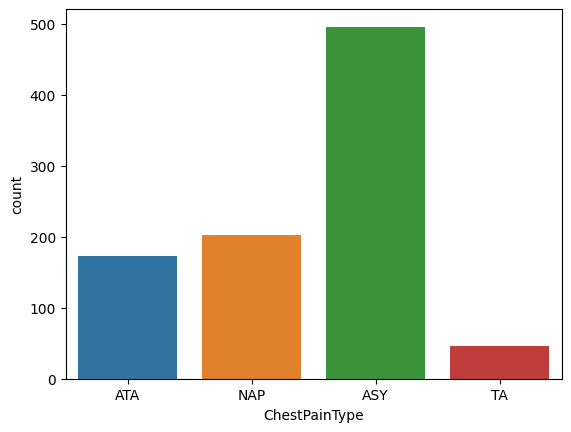

In [45]:
sns.countplot(x = 'ChestPainType', data=dados);

In [48]:
dados['RestingBP'].value_counts().sort_index() #pressão 0?


0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

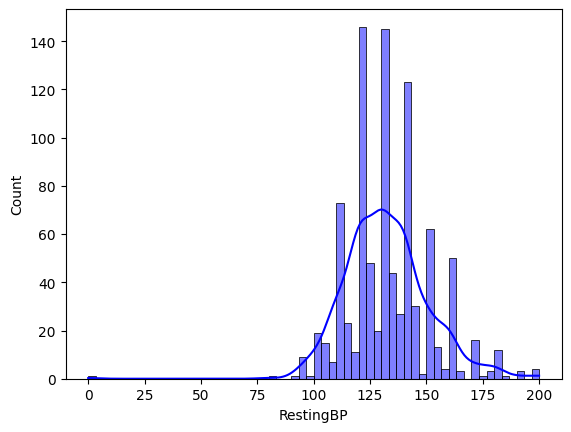

In [54]:
sns.histplot(dados, x='RestingBP', bins = 60, color = "blue", kde = True, stat = "count");

In [57]:
dados['Cholesterol'].value_counts().sort_index()

0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

<Axes: xlabel='Cholesterol', ylabel='Count'>

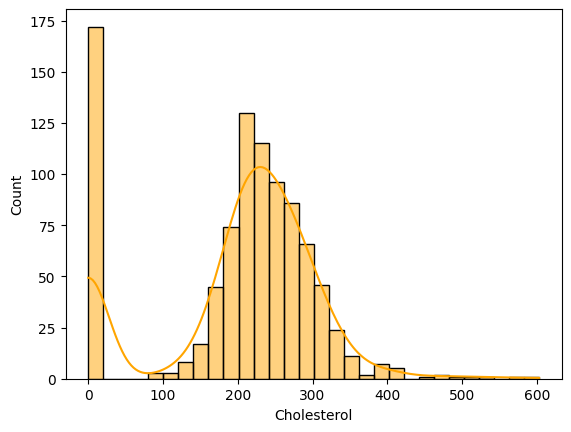

In [64]:
sns.histplot(dados, x='Cholesterol', bins=30, color="orange", kde=True, stat="count") #colesterol 0?

In [66]:
dados['FastingBS'].value_counts().sort_index()

0    704
1    214
Name: FastingBS, dtype: int64

0 = não diabetico
1 = diabetico

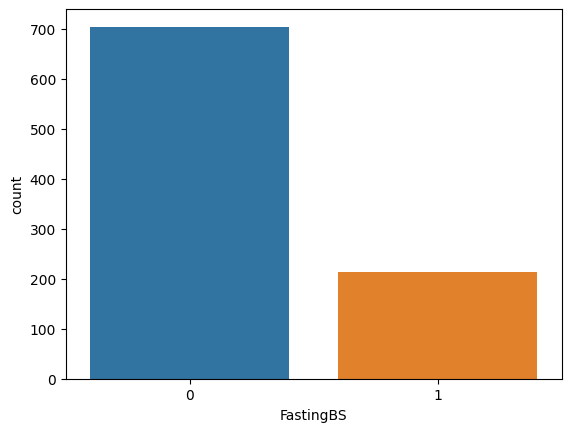

In [68]:
sns.countplot(x = "FastingBS", data = dados); # categorica ordinal distinta por números

In [69]:
dados['RestingECG'].value_counts() #eletrocardiograma em repouso

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

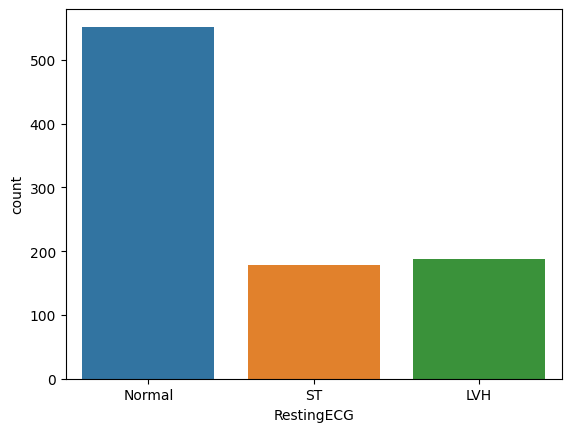

In [70]:
sns.countplot(x="RestingECG", data = dados);